# Comparison of BioLector and liter-scale bioreactor

### Imports and data loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import arviz
import calibr8
from matplotlib import cm, pyplot
import numpy
import os
import pathlib
import string
try:
    import pymc as pymc3
except:
    import pymc3

import cutisplit

import run_analysis


print(f"pymc {pymc3.__version__}")
print(f"calibr8 {calibr8.__version__}")

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc 4.0.0b2
calibr8 6.5.2


In [3]:
RUN_ID = "Fermentation"
resultpath = f'{RUN_ID}_Results' 

parent_dir = pathlib.Path(os.getcwd()).parent
df_inputs, df_kinetics = run_analysis.read_rounds(["BWA7DQ", "BZACW9", "C3C1XZ", "Fermentation", "Fermentation_YoaW"])

Error while reading the files. Repetition 3 does not exist and loop will be exited
Error while reading the files. Repetition 3 does not exist and loop will be exited
Error while reading the files. Repetition 3 does not exist and loop will be exited
Error while reading the files. Repetition 2 does not exist and loop will be exited
Error while reading the files. Repetition 2 does not exist and loop will be exited


# Load data from different rounds

In [4]:
idata_all =  arviz.from_netcdf(
    rf"{parent_dir}\notebooks\{resultpath}\{RUN_ID}_BioLector+Fermentation(LipALipBYoaW).nc"
)
idata1 = arviz.from_netcdf(
    rf"{parent_dir}\notebooks\BZACW9_Results\BZACW9_LCC_round1.nc"
)
idata2 = arviz.from_netcdf(
    rf"{parent_dir}\notebooks\C3C1XZ_Results\C3C1XZ_LCC_round2.nc"
)
idata_ferm = arviz.from_netcdf(
    rf"{parent_dir}\notebooks\{resultpath}\{RUN_ID}_LipAvsLipBvsYoaW.nc"
)

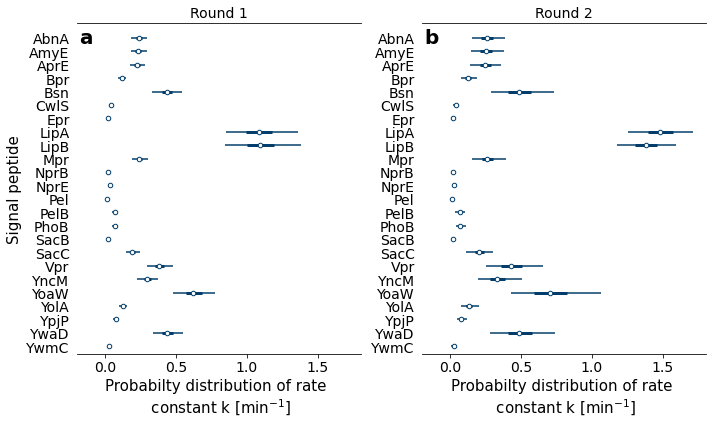

In [5]:
import string
fig, axs = pyplot.subplots(figsize=(10,6), ncols=2)
for i, (idat, ax) in enumerate(zip([idata1, idata2], axs.flatten())):
    arviz.plot_forest(idat, var_names=["k"], combined=True, ax=ax, colors=["#023D6B"])
    ax.set_xlabel("Probabilty distribution of rate \n constant k [min$^{-1}$]", size=15)
    strains = numpy.unique([
        strain[:-2]
        for strain in df_inputs.strain.values
])
    ax.set_yticklabels(strains[::-1])
    ax.set_xlim(-0.2, 1.8)
    ax.text(0.01, 0.94, string.ascii_lowercase[i], transform=ax.transAxes, 
            size=20, weight='bold')
    ax.set_title(f"Round {i+1}", size=14)
axs[0].set_ylabel("Signal peptide", size=15)
pyplot.tight_layout()
pyplot.savefig("LCC_kprobs_round1+2.png", dpi=200)

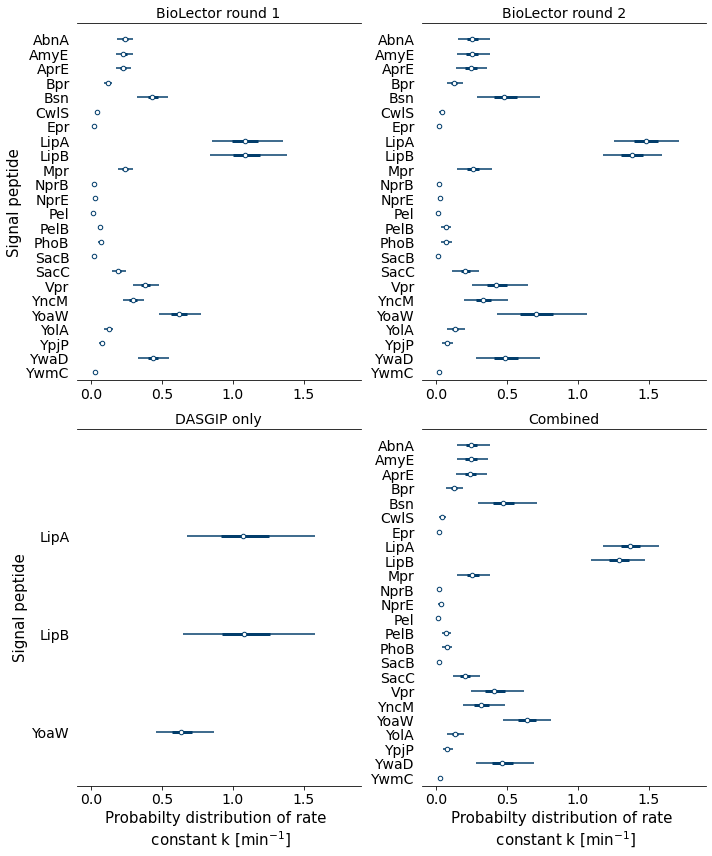

In [6]:
fig, axs = pyplot.subplots(figsize=(10,12), ncols=2, nrows=2)
titles = ["BioLector round 1", "BioLector round 2", "DASGIP only", "Combined"]
for i, (idata, ax) in enumerate(zip([idata1, idata2, idata_ferm, idata_all], axs.flatten())):
    arviz.plot_forest(idata, var_names=["k"], combined=True, ax=ax, colors=["#023D6B"])
    
    strains = numpy.unique([
        strain[:-2]
        for strain in df_inputs.strain.values
    ])
    try:
        ax.set_yticklabels(strains[::-1])
    except:
        ax.set_yticklabels(["YoaW", "LipB", "LipA"])

    ax.set_xlim(-0.1, 1.9)
    ax.set_title(titles[i], size=14)
axs[0,0].set_ylabel("Signal peptide", size=15)
axs[1,0].set_ylabel("Signal peptide", size=15)
axs[1,0].set_xlabel("Probabilty distribution of rate \n constant k [min$^{-1}$]", size=15)
axs[1,1].set_xlabel("Probabilty distribution of rate \n constant k [min$^{-1}$]", size=15)
pyplot.tight_layout()
#pyplot.savefig(fr"{resultpath}\{RUN_ID}_LCC30_ranking_comparison.png", dpi=200)

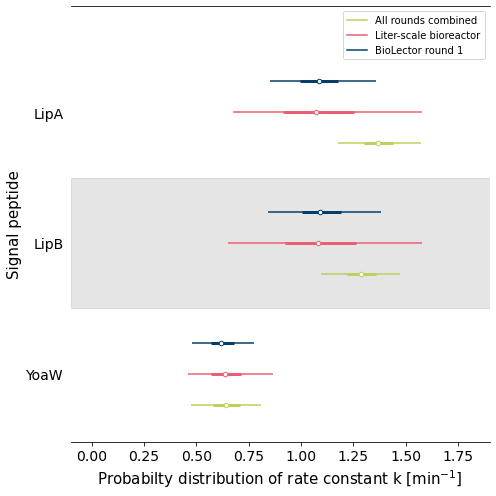

In [7]:
strains = numpy.unique([
    strain[:-2]
    for strain in df_inputs.strain.values
])

fig, ax = pyplot.subplots(figsize=(7,7)) 
idata_ferm.posterior["strain"] = ["LipA", "LipB", "YoaW"]
idata_all.posterior["strain"] = strains
arviz.plot_forest(
    [idata1, idata_ferm, idata_all],
    var_names=["k"], 
    model_names = ["BioLector round 1", "Liter-scale bioreactor", "All rounds combined"],
    coords={"strain": ["LipA", "LipB", "YoaW"]}, 
    combined=True, 
    ax=ax, colors=["#023D6B", "#eb5f73", "#b9d25f"],
    rope=None
)   
ax.set_facecolor
ax.set_yticklabels(["YoaW", "LipB", "LipA"])
ax.set_xlim(-0.1, 1.9)
ax.set_title("", size=14)
ax.set_ylabel("Signal peptide", size=15)
ax.set_xlabel("Probabilty distribution of rate constant k [min$^{-1}$]", size=15)
pyplot.tight_layout()
pyplot.savefig("LCC_bioreactor-vs.BIoLectorR1-vs.all.png", dpi=200)